In [1]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score

import matplotlib.pyplot as plt
import seaborn as sns

from EDA import *
from Preprocessing import *

### Importing Data

In [2]:
df_diabetes_data = pd.read_csv('../../../../Downloads/diabetes_data_upload.csv')

df_diabetes_data.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


### EDA

In [3]:
Basic_EDA_DF(df_diabetes_data)

,Column_Datatype,NullCount,Values_Count,Basic_Pandas_Describe
Age,int64,0.0,NaN,"{'count': 520.0, 'mean': 48.02884615384615, 's..."
Gender,object,0.0,"{'Male': 0.6307692307692307, 'Female': 0.36923...",NaN
Polyuria,object,0.0,"{'No': 0.5038461538461538, 'Yes': 0.4961538461...",NaN
Polydipsia,object,0.0,"{'No': 0.551923076923077, 'Yes': 0.44807692307...",NaN
sudden weight loss,object,0.0,"{'No': 0.5826923076923077, 'Yes': 0.4173076923...",NaN
weakness,object,0.0,"{'Yes': 0.5865384615384616, 'No': 0.4134615384...",NaN
Polyphagia,object,0.0,"{'No': 0.5442307692307692, 'Yes': 0.4557692307...",NaN
Genital thrush,object,0.0,"{'No': 0.7769230769230769, 'Yes': 0.2230769230...",NaN
visual blurring,object,0.0,"{'No': 0.551923076923077, 'Yes': 0.44807692307...",NaN
Itching,object,0.0,"{'No': 0.5134615384615384, 'Yes': 0.4865384615...",NaN


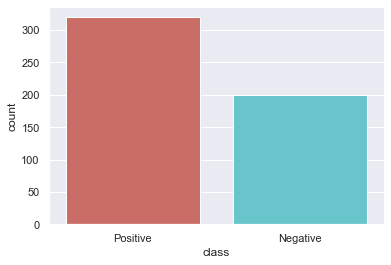

In [4]:
# Plotting the labels i.e. 'class' column - test if the dataset is unbalanced

sns.set(font_scale=1)
countplt=sns.countplot(x='class', data=df_diabetes_data, palette ='hls')
plt.show()

          average_age
class                
Negative    46.360000
Positive    49.071875


class
Negative    AxesSubplot(0.125,0.125;0.775x0.755)
Positive    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

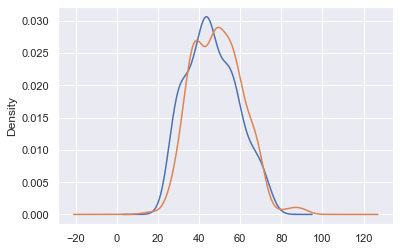

In [5]:
# Plotting the only numeric column 'Age' - test if data binning is needed

print(df_diabetes_data.groupby('class').agg(average_age=('Age', np.mean)))

df_diabetes_data.groupby('class').Age.plot(kind='kde')

### Preprocessing

#### Replace nulls

In [6]:
df_diabetes_data = Replace_Null(df_diabetes_data,'type')

#### Data binning

In [7]:
df_diabetes_data = Data_Binning(df_diabetes_data,'Age',0,120,10,'right')

df_diabetes_data.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Age_cat,Age_cat_codes
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive,"(30, 40]",3
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive,"(50, 60]",5
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive,"(40, 50]",4
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive,"(40, 50]",4
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive,"(50, 60]",5


#### Replace values to numeric

In [8]:
val = np.array([['Yes',1],['No',0],['Female',1],['Male',0],['Positive',1],['Negative',0]])

df_diabetes_data_STG = Replace_Values(df_diabetes_data,'all',val)

In [9]:
df_diabetes_data_STG.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Age_cat,Age_cat_codes
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,"(30, 40]",3
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,"(50, 60]",5
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,"(40, 50]",4
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,"(40, 50]",4
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,"(50, 60]",5


In [10]:
df_diabetes_data_STG = df_diabetes_data_STG.drop(['Age','Age_cat'], axis=1)

df_diabetes_data_STG.head()

,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class,Age_cat_codes
0,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1,3
1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1,5
2,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1,4
3,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1,4
4,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,5


### Models

In [11]:
def evaluate(model, features, labels):
    
    predictions = model.predict(features)   

    print('Model Performance')
    
    acc = accuracy_score(labels,predictions)*100
    print('Accuracy = {:0.2f}%.'.format(acc))
    
    pre = precision_score(labels,predictions,pos_label='1')*100
    print('Precision = {:0.2f}%.'.format(pre))
    
    rec = recall_score(labels,predictions,pos_label='1')*100
    print('Recall = {:0.2f}%.'.format(rec))
    
    return acc,pre,rec,predictions

In [12]:
#Creating train and test datasets

df_diabetes_data_STG_for_datasets = df_diabetes_data_STG.copy()

x = df_diabetes_data_STG_for_datasets.drop('class',axis=1)
y = df_diabetes_data_STG_for_datasets['class']

X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

#### Naive Bayes

In [13]:
model_NB = GaussianNB()
model_NB.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
evaluate(model_NB, X_test, y_test)

Model Performance
Accuracy = 91.54%.
Precision = 92.94%.
Recall = 94.05%.


(91.53846153846153,
 92.94117647058823,
 94.04761904761905,
 array(['1', '1', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0',
        '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0',
        '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0',
        '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0',
        '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
        '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0',
        '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0',
        '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0',
        '1', '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '1', '0',
        '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0', '1', '0'],
       dtype='<U1'))

#### Random Forest

In [15]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train,y_train)

C:\Users\Aman\Anaconda3\envs\py4dp\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=2, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [16]:
evaluate(clf, X_test, y_test)

Model Performance
Accuracy = 88.46%.
Precision = 87.91%.
Recall = 95.24%.


(88.46153846153845,
 87.91208791208791,
 95.23809523809523,
 array(['1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0',
        '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0',
        '1', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0',
        '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0',
        '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1',
        '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0',
        '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1',
        '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0',
        '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '0',
        '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0', '1', '0'],
       dtype=object))

In [17]:
evaluate(clf, X_train, y_train)

Model Performance
Accuracy = 90.26%.
Precision = 91.25%.
Recall = 92.80%.


(90.25641025641026,
 91.25,
 92.79661016949152,
 array(['1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '1', '0', '1',
        '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0',
        '0', '1', '0', '1', '1', '0', '1', '0', '1', '1', '1', '0', '1',
        '1', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0',
        '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0',
        '1', '1', '1', '1', '0', '1', '0', '0', '1', '0', '1', '0', '0',
        '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '0',
        '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0',
        '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0',
        '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1',
        '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1',
        '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '1',
        '0', '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '0', '0',
   

In [18]:
clf.feature_importances_

array([0.10373927, 0.2089679 , 0.22292623, 0.16911897, 0.        ,
       0.        , 0.        , 0.02050238, 0.04972407, 0.0449222 ,
       0.00655853, 0.07216696, 0.02027561, 0.03552731, 0.        ,
       0.04557056])

In [19]:
clf.get_params()

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 2,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

##### Hyperparameters tuning

In [20]:
# Create the parameter grid
param_grid = {
    'bootstrap': [True],
    'max_depth': [2, 4, 6, 8],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 20, 30]
}

# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [21]:
# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done 472 tasks      | elapsed:   10.7s
[Parallel(n_jobs=-1)]: Done 641 out of 648 | elapsed:   13.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:   13.2s finished
C:\Users\Aman\Anaconda3\envs\py4dp\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [22]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 6,
 'max_features': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 8,
 'n_estimators': 30}

In [23]:
best_grid = grid_search.best_estimator_

In [24]:
#Testing the metrics on test dataset

grid_test_metrics = evaluate(best_grid, X_test, y_test)

grid_test_metrics

Model Performance
Accuracy = 93.85%.
Precision = 95.24%.
Recall = 95.24%.


(93.84615384615384,
 95.23809523809523,
 95.23809523809523,
 array(['0', '1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0',
        '0', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0',
        '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0',
        '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '0', '0',
        '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1',
        '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0',
        '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0',
        '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '0', '0',
        '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0',
        '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0', '1', '0'],
       dtype=object))

In [25]:
#Testing the metrics on train dataset

grid_train_metrics = evaluate(best_grid, X_train, y_train)

grid_train_metrics

Model Performance
Accuracy = 94.36%.
Precision = 96.93%.
Recall = 93.64%.


(94.35897435897435,
 96.9298245614035,
 93.64406779661016,
 array(['1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1',
        '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0',
        '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1',
        '1', '0', '0', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0',
        '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0',
        '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0',
        '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0',
        '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0',
        '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '1', '0', '1',
        '0', '1', '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1',
        '0', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1',
        '1', '0', '0', '1', '0', '1', '1', '0', '0', '0', '0', '0', '0',
        '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0

In [26]:
best_grid.feature_importances_

array([0.10432938, 0.31512885, 0.18633417, 0.06752074, 0.01681591,
       0.01945032, 0.01695928, 0.02208369, 0.0191872 , 0.0500578 ,
       0.015868  , 0.05744696, 0.01573339, 0.04698188, 0.00554157,
       0.04056085])

In [27]:
# Create the parameter grid with 'max_features' as ['auto','log2'] in order to improve the metrics

param_grid_mf = {
    'bootstrap': [True],
    'max_depth': [2, 4, 6, 8],
    'max_features': ['auto','log2'],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [10, 20, 30]
}
# Create a based model
rf_mf = RandomForestClassifier()
# Instantiate the grid search model
grid_search_mf = GridSearchCV(estimator = rf_mf, param_grid = param_grid_mf, 
                          cv = 3, n_jobs = -1, verbose = 2)


In [28]:
grid_search_mf.fit(X_train,y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  92 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done 576 tasks      | elapsed:    8.5s
[Parallel(n_jobs=-1)]: Done 648 out of 648 | elapsed:    9.5s finished
C:\Users\Aman\Anaconda3\envs\py4dp\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [29]:
grid_search_mf.best_params_

{'bootstrap': True,
 'max_depth': 8,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 10,
 'n_estimators': 30}

In [30]:
best_grid_mf = grid_search_mf.best_estimator_

In [31]:
#Predicting and testing the metrics on test dataset

evaluate(best_grid_mf, X_test, y_test)

Model Performance
Accuracy = 93.08%.
Precision = 94.12%.
Recall = 95.24%.


(93.07692307692308,
 94.11764705882352,
 95.23809523809523,
 array(['0', '1', '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '0',
        '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0',
        '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1', '0', '0',
        '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '1', '0', '0',
        '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1',
        '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '0', '0',
        '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '1', '0',
        '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0',
        '1', '1', '0', '0', '0', '0', '0', '1', '0', '0', '0', '1', '0',
        '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0', '1', '0'],
       dtype=object))

In [32]:
#Assessing the metrics on train dataset

evaluate(best_grid_mf, X_train, y_train)

Model Performance
Accuracy = 96.67%.
Precision = 97.05%.
Recall = 97.46%.


(96.66666666666667,
 97.0464135021097,
 97.45762711864407,
 array(['1', '1', '1', '1', '0', '1', '1', '1', '0', '1', '0', '0', '1',
        '1', '1', '1', '1', '0', '1', '1', '0', '1', '1', '0', '1', '0',
        '0', '1', '0', '0', '1', '0', '1', '0', '1', '1', '1', '0', '1',
        '1', '0', '1', '0', '1', '1', '1', '0', '0', '1', '0', '0', '0',
        '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0',
        '1', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '0', '0',
        '1', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '0', '0',
        '0', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0',
        '1', '1', '1', '1', '0', '1', '1', '0', '0', '0', '1', '1', '1',
        '0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '1',
        '0', '1', '0', '1', '1', '1', '0', '1', '0', '1', '1', '1', '1',
        '1', '0', '1', '1', '0', '1', '1', '0', '0', '0', '0', '1', '0',
        '0', '0', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0

In [33]:
best_grid_mf.feature_importances_

array([0.07775172, 0.2558057 , 0.2130321 , 0.10401287, 0.01528012,
       0.02792749, 0.01508526, 0.02128589, 0.03215611, 0.04320288,
       0.02292763, 0.03428733, 0.0183229 , 0.04990027, 0.01063942,
       0.05838231])

##### Features selection

In [34]:
!pip install Boruta

In [35]:
from boruta import BorutaPy

forest = RandomForestClassifier(n_estimators=30, n_jobs=-1, max_depth=6)

trans = BorutaPy(forest,max_iter=20, random_state=42, verbose=2)
sel = trans.fit_transform(X_train.values, y_train.values)

trans.ranking_

Iteration: 	1 / 20
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	2 / 20
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	3 / 20
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	4 / 20
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	5 / 20
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	6 / 20
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	7 / 20
Confirmed: 	0
Tentative: 	16
Rejected: 	0
Iteration: 	8 / 20
Confirmed: 	10
Tentative: 	6
Rejected: 	0
Iteration: 	9 / 20
Confirmed: 	10
Tentative: 	5
Rejected: 	1
Iteration: 	10 / 20
Confirmed: 	10
Tentative: 	5
Rejected: 	1
Iteration: 	11 / 20
Confirmed: 	10
Tentative: 	5
Rejected: 	1
Iteration: 	12 / 20
Confirmed: 	11
Tentative: 	4
Rejected: 	1
Iteration: 	13 / 20
Confirmed: 	11
Tentative: 	4
Rejected: 	1
Iteration: 	14 / 20
Confirmed: 	11
Tentative: 	4
Rejected: 	1
Iteration: 	15 / 20
Confirmed: 	11
Tentative: 	4
Rejected: 	1
Iteration: 	16 / 20
Confirmed: 	13
Tentative: 	2
Rejected: 	1
Iteration: 	17 / 

array([1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1])

In [36]:
df_features_all = pd.DataFrame({
                            'col_key': list(X_train.columns)
                            ,'clf':clf.feature_importances_
                            ,'best_grid':best_grid.feature_importances_
                            ,'best_grid_mf':best_grid_mf.feature_importances_
                            ,'boruta':trans.ranking_
                           }).set_index('col_key')

df_features_all

,clf,best_grid,best_grid_mf,boruta
col_key,,,,
Gender,0.103739,0.104329,0.077752,1
Polyuria,0.208968,0.315129,0.255806,1
Polydipsia,0.222926,0.186334,0.213032,1
sudden weight loss,0.169119,0.067521,0.104013,1
weakness,0.000000,0.016816,0.015280,2
Polyphagia,0.000000,0.019450,0.027927,1
Genital thrush,0.000000,0.016959,0.015085,1
visual blurring,0.020502,0.022084,0.021286,1
Itching,0.049724,0.019187,0.032156,1
